<a href="https://colab.research.google.com/github/dntwaritag/Climate-Resilience/blob/main/Summative_Intro_to_ml_Denys_Ntwaritaganzwa_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

## Objective: Implementation of Machine Learning Models with regularization, optimization, and error analysis to improve performance, convergence speed, and efficiency.

**Step 1: Import Required Libraries**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
import os

In [72]:
# Ensure directory exists to save models
os.makedirs("saved_models", exist_ok=True)

**Step 2: Load Dataset**

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Mathematics for Machine Learning/seattle-weather.csv')
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1461, 6)


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


**Step 3: Data Preprocessing**

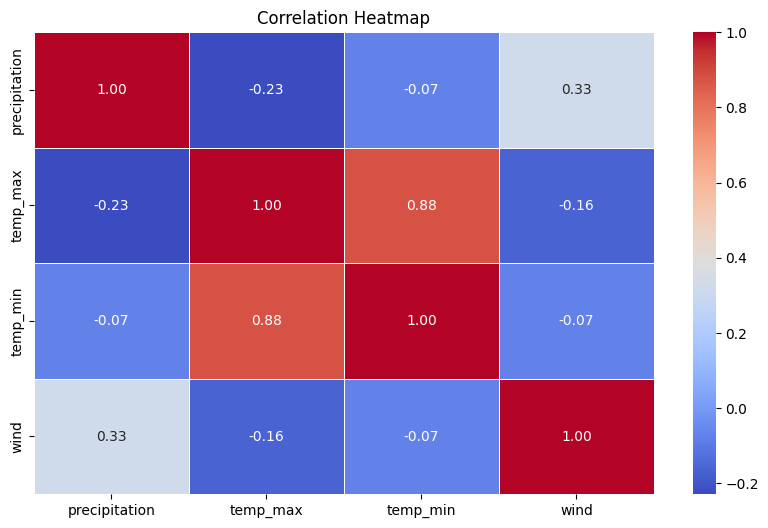

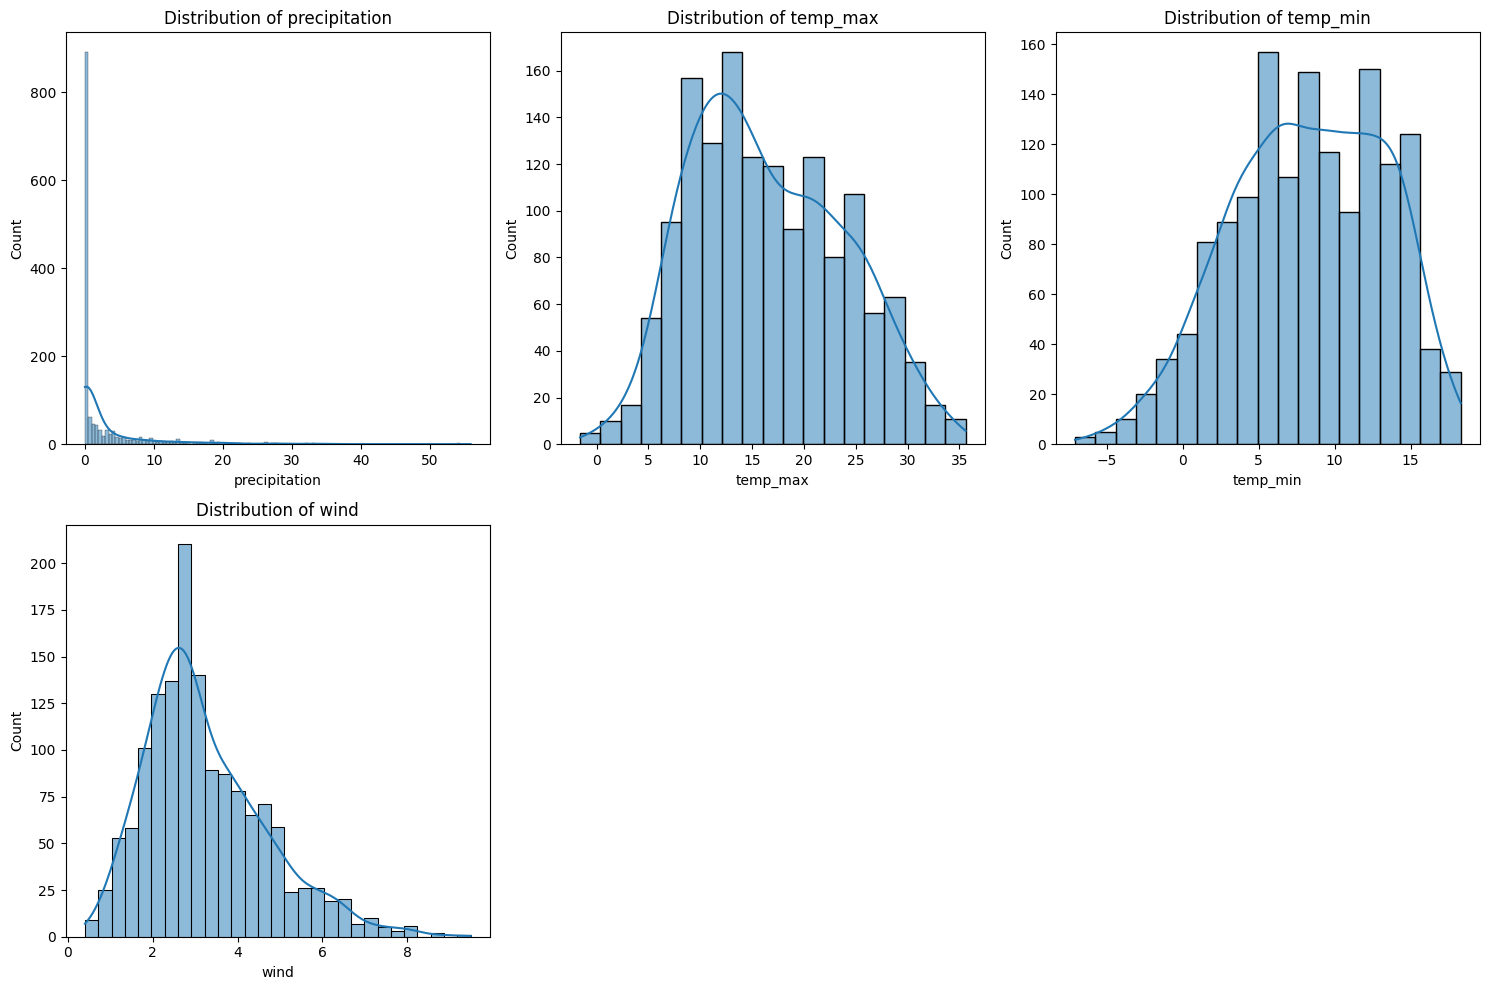

In [75]:
# Data Preprocessing
# Convert categorical 'weather' column to numeric values using Label Encoding
df['weather'] = LabelEncoder().fit_transform(df['weather'])

# Define feature variables (X) and target variable (y)
X = df.drop(columns=['weather', 'date'])
y = df['weather']

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Distribution of features
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns[:5], 1):
    plt.subplot(2, 3, i)
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [76]:
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4
1460,2015-12-31,0.0,5.6,-2.1,3.5,4


**Step 4: Split the dataset into Training (80%), Validation (10%), and Test (10%)**

In [77]:
# Split the dataset into Training (80%), Validation (10%), and Test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize feature variables for better performance in ML models
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

**Section 3: Model Architecture & Classical ML Models (Logistic Regression, SVM, etc.)**

Instance 1: Logistic Regression (No Optimization)

In [78]:
# Logistic Regression Model (Instance 1: No optimization)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        12
           2       0.85      0.83      0.84        63
           3       0.00      0.00      0.00         3
           4       0.67      0.94      0.78        62

    accuracy                           0.75       147
   macro avg       0.31      0.35      0.32       147
weighted avg       0.65      0.75      0.69       147

Accuracy: 0.7482993197278912


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Instance 2: Support Vector Machine (SVM) with Optimization

In [79]:
# Support Vector Machine (SVM) Model (Instance 2: Hyperparameter tuning)
svm = SVC(kernel='rbf', C=1.0, gamma=0.01)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluation
print("SVM Model Evaluation:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Model Evaluation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        12
           2       0.81      0.75      0.78        63
           3       0.00      0.00      0.00         3
           4       0.63      0.90      0.74        62

    accuracy                           0.70       147
   macro avg       0.29      0.33      0.30       147
weighted avg       0.61      0.70      0.65       147

Accuracy: 0.7006802721088435


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Section 4: Neural Network Models**

**Instance 1: Simple Neural Network (No Optimization)**

In [80]:
# Simple Neural Network (Instance 1: No optimizer, no early stopping)
nn_model_1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])

nn_model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_model_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Save model
nn_model_1.save('saved_models/instance_1_nn.h5')

# Evaluation
y_pred_nn_1 = np.argmax(nn_model_1.predict(X_test), axis=1)
print("Instance 1 Neural Network Evaluation:")
print(classification_report(y_test, y_pred_nn_1))


Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3799 - loss: 1.5323 - val_accuracy: 0.6233 - val_loss: 1.1645
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6493 - loss: 1.1013 - val_accuracy: 0.7055 - val_loss: 0.9354
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6941 - loss: 0.9210 - val_accuracy: 0.7466 - val_loss: 0.8606
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7495 - loss: 0.8177 - val_accuracy: 0.7671 - val_loss: 0.7944
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7622 - loss: 0.7747 - val_accuracy: 0.7671 - val_loss: 0.7414
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7675 - loss: 0.7506 - val_accuracy: 0.7740 - val_loss: 0.7090
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7854 - loss: 0.6998 - val_accuracy: 0.7740 - val_loss: 0.6853
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7634 - loss: 0.7121 - val_accuracy: 0.7671 - val_loss:

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Instance 1 Neural Network Evaluation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        12
           2       0.86      0.89      0.88        63
           3       0.00      0.00      0.00         3
           4       0.72      0.95      0.82        62

    accuracy                           0.78       147
   macro avg       0.32      0.37      0.34       147
weighted avg       0.67      0.78      0.72       147



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Instance 2: Neural Network with Adam Optimizer, L2 Regularization, and Early Stopping**

In [81]:
# Neural Network (Instance 2: Adam Optimizer, L2 Regularization, Early Stopping)
nn_model_2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(len(np.unique(y_train)), activation='softmax')
])

optimizer = Adam(learning_rate=0.001)
nn_model_2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
nn_model_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[early_stopping])

# Save model
nn_model_2.save('saved_models/instance_2_nn.h5')

# Evaluation
y_pred_nn_2 = np.argmax(nn_model_2.predict(X_test), axis=1)
print("Instance 2 Neural Network Evaluation:")
print(classification_report(y_test, y_pred_nn_2))


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4391 - loss: 1.8859 - val_accuracy: 0.7055 - val_loss: 1.5575
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6431 - loss: 1.5121 - val_accuracy: 0.7260 - val_loss: 1.3263
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6975 - loss: 1.2806 - val_accuracy: 0.7329 - val_loss: 1.1844
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7118 - loss: 1.2128 - val_accuracy: 0.7534 - val_loss: 1.0857
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7272 - loss: 1.1197 - val_accuracy: 0.7603 - val_loss: 1.0102
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7517 - loss: 1.0145 - val_accuracy: 0.7740 - val_loss: 0.9514
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7506 - loss: 0.9663 - val_accuracy: 0.7740 - val_loss: 0.9120
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7482 - loss: 0.9178 - val_accuracy: 0.7671 - val_loss:

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Instance 2 Neural Network Evaluation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        12
           2       0.86      0.89      0.88        63
           3       0.00      0.00      0.00         3
           4       0.71      0.94      0.81        62

    accuracy                           0.78       147
   macro avg       0.31      0.36      0.34       147
weighted avg       0.67      0.78      0.71       147



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Instance 3: Neural Network with RMSprop Optimizer, L1 Regularization, and Higher Epochs**

In [82]:
# Neural Network (Instance 3: RMSprop Optimizer, L1 Regularization, Higher Epochs)
nn_model_3 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l1(0.01)),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(len(np.unique(y_train)), activation='softmax')
])

optimizer = RMSprop(learning_rate=0.0005)
nn_model_3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

nn_model_3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

# Save model
nn_model_3.save('saved_models/instance_3_nn.h5')

# Evaluation
y_pred_nn_3 = np.argmax(nn_model_3.predict(X_test), axis=1)
print("Instance 3 Neural Network Evaluation:")
print(classification_report(y_test, y_pred_nn_3))


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1146 - loss: 4.5225 - val_accuracy: 0.5068 - val_loss: 4.0302
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4714 - loss: 3.9470 - val_accuracy: 0.5616 - val_loss: 3.5880
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5941 - loss: 3.5046 - val_accuracy: 0.5959 - val_loss: 3.1885
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6152 - loss: 3.1132 - val_accuracy: 0.6575 - val_loss: 2.8300
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6478 - loss: 2.7908 - val_accuracy: 0.6781 - val_loss: 2.5243
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7047 - loss: 2.4551 - val_accuracy: 0.7055 - val_loss: 2.2593
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6801 - loss: 2.2199 - val_accuracy: 0.7123 - val_loss: 2.0249
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6798 - loss: 1.9913 - val_accuracy: 0.7192 - v

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Instance 3 Neural Network Evaluation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        12
           2       0.94      0.78      0.85        63
           3       0.00      0.00      0.00         3
           4       0.65      1.00      0.79        62

    accuracy                           0.76       147
   macro avg       0.32      0.36      0.33       147
weighted avg       0.68      0.76      0.70       147



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Section 5: Optimization and Parameter Settings**

In [83]:
# Save results to a table
results_table = pd.DataFrame({
    'Instance': ['Instance 1', 'Instance 2', 'Instance 3'],
    'Optimizer': ['Default (Adam)', 'Adam', 'RMSprop'],
    'Regularizer': ['None', 'L2 (0.01)', 'L1 (0.01)'],
    'Epochs': [20, 50, 100],
    'Early Stopping': ['No', 'Yes', 'No'],
    'Accuracy': [accuracy_score(y_test, y_pred_nn_1), accuracy_score(y_test, y_pred_nn_2), accuracy_score(y_test, y_pred_nn_3)],
    'F1 Score': [f1_score(y_test, y_pred_nn_1, average='weighted'), f1_score(y_test, y_pred_nn_2, average='weighted'), f1_score(y_test, y_pred_nn_3, average='weighted')],
    'Precision': [precision_score(y_test, y_pred_nn_1, average='weighted'), precision_score(y_test, y_pred_nn_2, average='weighted'), precision_score(y_test, y_pred_nn_3, average='weighted')],
    'Recall': [recall_score(y_test, y_pred_nn_1, average='weighted'), recall_score(y_test, y_pred_nn_2, average='weighted'), recall_score(y_test, y_pred_nn_3, average='weighted')]
})

print(results_table)


     Instance       Optimizer Regularizer  Epochs Early Stopping  Accuracy  \
0  Instance 1  Default (Adam)        None      20             No  0.782313   
1  Instance 2            Adam   L2 (0.01)      50            Yes  0.775510   
2  Instance 3         RMSprop   L1 (0.01)     100             No  0.755102   

   F1 Score  Precision    Recall  
0  0.720616   0.672698  0.782313  
1  0.714758   0.667555  0.775510  
2  0.698334   0.679106  0.755102  


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Section 6: Save ML Algorithm Model (XGBoost)**

In [84]:
# XGBoost Model (Instance 4)
xgb_model = XGBClassifier(learning_rate=0.01, max_depth=6, n_estimators=100)
xgb_model.fit(X_train, y_train)

# Save model
import joblib
joblib.dump(xgb_model, 'saved_models/model_ml_algo.pkl')

# Evaluation
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Model Evaluation:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.00      0.00      0.00        12
           2       0.97      0.89      0.93        63
           3       0.33      0.33      0.33         3
           4       0.73      0.98      0.84        62

    accuracy                           0.81       147
   macro avg       0.61      0.47      0.47       147
weighted avg       0.77      0.81      0.77       147



**Step 8: Evaluate Neural Network Models**

In [87]:
# Evaluate Neural Network Models
for name, (model, history) in trained_models.items():
    print(f"\nEvaluating {name}...")
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1) # Get the class with the highest probability
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}, Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}, Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}, F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")


Evaluating Instance_1...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        12
           2       0.92      0.87      0.89        63
           3       0.00      0.00      0.00         3
           4       0.72      0.98      0.83        62

    accuracy                           0.79       147
   macro avg       0.33      0.37      0.34       147
weighted avg       0.70      0.79      0.73       147

Confusion Matrix:
 [[ 0  0  0  0  7]
 [ 0  0  1  0 11]
 [ 0  0 55  2  6]
 [ 0  0  3  0  0]
 [ 0  0  1  0 61]]
Instance_1 - Accuracy: 0.7891, Precision: 0.6955, Recall: 0.7891, F1-Score: 0.7333

Evaluating Instance_2...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Instance_2 - Accuracy: 0.7687, Precision: 0.6768, Recall: 0.7687, F1-Score: 0.7100

Evaluating Instance_3...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        12
           2       0.83      0.86      0.84        63
           3       0.00      0.00      0.00         3
           4       0.70      0.92      0.79        62

    accuracy                           0.76       147
   macro avg       0.31      0.36      0.33       147
weighted avg       0.65      0.76      0.70       147

Confusion Matrix:
 [[ 0  0  1  0  6]
 [ 0  0  2  0 10]
 [ 0  0 54  0  9]
 [ 0  0  3  0  0]
 [ 0  0  5  0 57]]
Instance_3 - Accuracy: 0.7551, Precision: 0.6492, Recall: 0.7551, F1-Score: 0.6955

Evaluating Instance_4...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Classification Report:
               precision    recall  f1-score   support

    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

**Step 9: Save Models**

In [88]:
# Save Models
for name, (model, _) in trained_models.items():
    model.save(f"saved_models/{name}.h5")

**Step 10: Generate Neural Network Diagram**

**Step 11: Plot Training History**

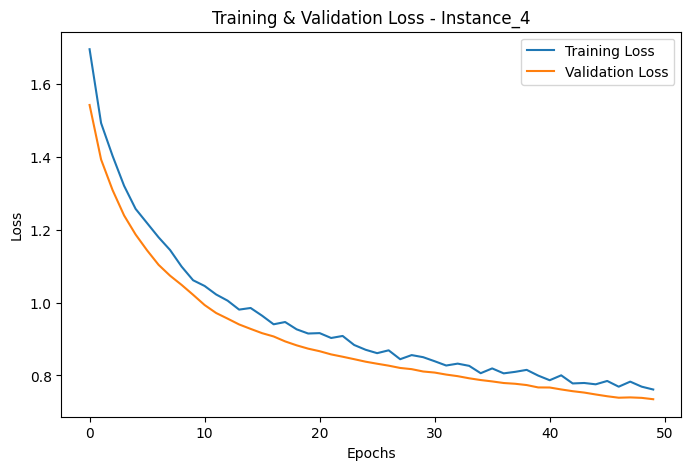

In [89]:
# Plot training history for each instance
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'Training & Validation Loss - {name}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()